<a href="https://colab.research.google.com/github/Priyo-prog/Generative-AI-Lessons/blob/main/DCGANs/DCGAN_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DCGAN - Deep Convolutional GANs**

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

## Loading And Preprocessing The Dataset

In [2]:
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Images for training
X_train.shape

(60000, 28, 28)

In [4]:
# Classes for training
y_train.shape

(60000,)

In [5]:
# View the class of a random image
i = np.random.randint(0, 60000)
print(i)
print(y_train[i])

16906
1


12148
3


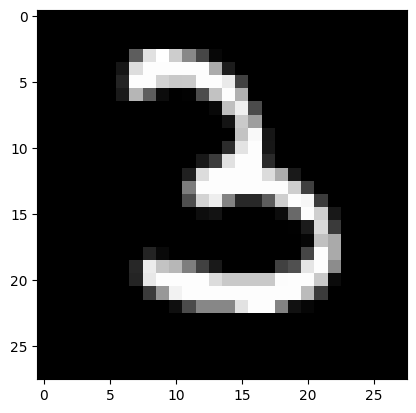

In [8]:
# View the image and the class
i = np.random.randint(0, 60000)
print(i)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray')